<a href="https://colab.research.google.com/github/plancute/python/blob/master/deeplearning/code/11_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%8B%A4%EB%A3%A8%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11장 데이터 다루기

'필요한' 데이터가 얼마나 많은가? <br>
머신러닝 프로젝트의 성공과 실패는 얼마나 좋은 데이터를 가지고 시작하느냐에 영향을 많이 받는다. <br>
좋은 데이터란? <br>
. 내가 알아내고자 하는 정보를 잘 담고 있는 데이터<br>
. 한쪽으로 치우치지 않은 것 <br>
. 불필요한 정보를 가지고 있지 않은 것 <br>
. 왜곡되지 않은 것 <br>
* 학습한 code <br>
deep_code/02_Data_preparation.py <br>
deep_code/02_Pima_Indian.py

11-1 ) 데이터 파악

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# 피마 인디언 당뇨병 데이터셋을 불러옵니다.
# 불러올 때 각 컬럼에 해당하는 이름을 지정합니다.
df = pd.read_csv('/content/drive/My Drive/data/pima-indians-diabetes.csv', names=["pregnant","plasma","pressure","thickness","insulin","BMI","pedigree","age","class"])

In [3]:
# 처음 5줄을 봅니다.
df.head(5)

pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age  class
0         6     148        72         35        0  33.6     0.627   50      1
1         1      85        66         29        0  26.6     0.351   31      0
2         8     183        64          0        0  23.3     0.672   32      1
3         1      89        66         23       94  28.1     0.167   21      0
4         0     137        40         35      168  43.1     2.288   33      1

768명의 인디언, 8개의 속성 , 1개의 클래스 <br>
1. pregnant : 과거 임신 횟수 <br>
2. plasma	 : 포도당 부하 검사 2시간 후 공복 혈당 농도 (mm Hg) <br>
3. pressure	: 확장기 혈압 (mm Hg) <br>
4. thickness	: 삼두근 피부 주름 두께 (mm) <br>
5. insulin	: 혈청 인슐린 (2-hour, mu U/ml) <br>
6. BMI	: 체질량지수 (BMI, weight in kg/(height in m)^2) <br>
7. pedigree : 당뇨병 가족력	<br>
8. age	: 나이 <br>
9. class : 당뇨(1), 당뇨아님(0) <br>

In [4]:
# 데이터의 전반적인 정보를 확인해 봅니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# 각 정보별 특징을 좀 더 자세히 출력합니다.
df.describe()

pregnant      plasma    pressure  ...    pedigree         age       class
count  768.000000  768.000000  768.000000  ...  768.000000  768.000000  768.000000
mean     3.845052  120.894531   69.105469  ...    0.471876   33.240885    0.348958
std      3.369578   31.972618   19.355807  ...    0.331329   11.760232    0.476951
min      0.000000    0.000000    0.000000  ...    0.078000   21.000000    0.000000
25%      1.000000   99.000000   62.000000  ...    0.243750   24.000000    0.000000
50%      3.000000  117.000000   72.000000  ...    0.372500   29.000000    0.000000
75%      6.000000  140.250000   80.000000  ...    0.626250   41.000000    1.000000
max     17.000000  199.000000  122.000000  ...    2.420000   81.000000    1.000000

[8 rows x 9 columns]

In [6]:
#  데이터 중 임신 정보와 클래스 만을 출력해봅니디ㅏ.
df[['plasma','class']]

plasma  class
0       148      1
1        85      0
2       183      1
3        89      0
4       137      1
..      ...    ...
763     101      0
764     122      0
765     121      0
766     126      1
767      93      0

[768 rows x 2 columns]

In [7]:
# 데이터간의 상관관계를 그래프로 표현
colormap = plt.cm.gist_heat # 그래프의 색상 구성 정함
plt.figure(figsize=(12,12)) # 그래프의 크기 정함

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

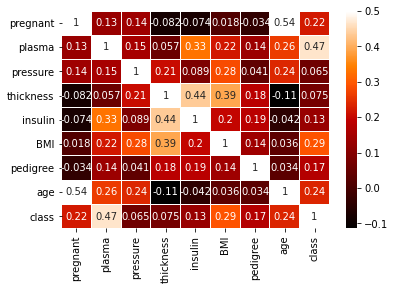

In [8]:
# 그래프의 속성 결정, ymax의 값을 0 5로 정해 0.5에 가까울 수록 밝은 색으로 표시되게 합니다.
sns.heatmap(df.corr(),linewidths=0.1,vmax=0.5, cmap=colormap, linecolor='white',annot=True)
plt.show()

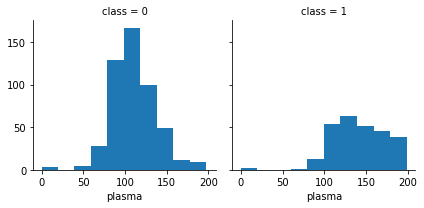

In [9]:
# 위의 상관관계 heatmap에서 plasma가 class와 가장 상관관계가 높다는 사실을 확인하였다.
# 2개 항목만 떼서 두 항목 간의 관계를 그래프로 다시 확인 
grid = sns.FacetGrid(df,col='class')
grid.map(plt.hist, 'plasma',bins=10)
plt.show()

## 당뇨병 환자의 경우(class=1) plasma항목의 수치가 150 이상인 경우가 많음
## 결과에 미치는 영향이 큰 항목을 발견하는 것이 데이터 전처리 과정의 한 예
## 이는 모든 머신러닝의 성능 향상에 중요한 역할을 함

11-2 ) 학습(예측)

In [10]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
import tensorflow as tf

# seed 값 생성
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(seed)

# 데이터 로드
dataset = numpy.loadtxt('/content/drive/My Drive/data/pima-indians-diabetes.csv', delimiter=",")
X = dataset[:,0:8]
Y = dataset[:,8]

# 모델의 설정
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# 모델 실행
model.fit(X, Y, epochs=200, batch_size=10)

# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))



Epoch 1/200
77/77 [==============================] - 0s 978us/step - loss: 7.0523 - accuracy: 0.6211
Epoch 2/200
77/77 [==============================] - 0s 947us/step - loss: 2.0855 - accuracy: 0.6185
Epoch 3/200
77/77 [==============================] - 0s 964us/step - loss: 1.3581 - accuracy: 0.5859
Epoch 4/200
77/77 [==============================] - 0s 980us/step - loss: 1.0376 - accuracy: 0.5924
Epoch 5/200
77/77 [==============================] - 0s 930us/step - loss: 0.8678 - accuracy: 0.6263
Epoch 6/200
77/77 [==============================] - 0s 941us/step - loss: 0.7723 - accuracy: 0.6198
Epoch 7/200
77/77 [==============================] - 0s 929us/step - loss: 0.7391 - accuracy: 0.6237
Epoch 8/200
77/77 [==============================] - 0s 1ms/step - loss: 0.7103 - accuracy: 0.6419
Epoch 9/200
77/77 [==============================] - 0s 952us/step - loss: 0.6853 - accuracy: 0.6380
Epoch 10/200
77/77 [==============================] - 0s 909us/step - loss: 0.6733 - accuracy

In [11]:
# 약 75.78% 의 정확도를 보인다.